In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("water_potability.csv")

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
# Display information about the DataFrame
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
print(df.shape)
# Find the number of rows within a dataframe
print(len(df))
# Extracting information from the shape tuple
print(f'Number of rows: {df.shape[0]} \nNumber of columns: {df.shape[1]}')

(3276, 10)
3276
Number of rows: 3276 
Number of columns: 10


# 1a. Summary statistics

In [7]:
# Review the high level summary details for each variable
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# 1b. Missing values

In [9]:
# Check for the missing values by columns
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [10]:
# Proportion of missing values by column
def isnull_prop(df):
    total_rows = df.shape[0]
    missing_val_dict = {}
    for col in df.columns:
        missing_val_dict[col] = [df[col].isnull().sum(), (df[col].isnull().sum() / total_rows)]
    return missing_val_dict

# Apply the missing value method
null_dict = isnull_prop(df)
print(null_dict.items())

dict_items([('ph', [491, 0.14987789987789987]), ('Hardness', [0, 0.0]), ('Solids', [0, 0.0]), ('Chloramines', [0, 0.0]), ('Sulfate', [781, 0.23840048840048841]), ('Conductivity', [0, 0.0]), ('Organic_carbon', [0, 0.0]), ('Trihalomethanes', [162, 0.04945054945054945]), ('Turbidity', [0, 0.0]), ('Potability', [0, 0.0])])


In [11]:
# Create a dataframe of the missing value information
df_missing = pd.DataFrame.from_dict(null_dict, orient="index", columns=['missing', 'miss_percent'])
df_missing

,missing,miss_percent
ph,491,0.149878
Hardness,0,0.000000
Solids,0,0.000000
Chloramines,0,0.000000
Sulfate,781,0.238400
Conductivity,0,0.000000
Organic_carbon,0,0.000000
Trihalomethanes,162,0.049451
Turbidity,0,0.000000
Potability,0,0.000000


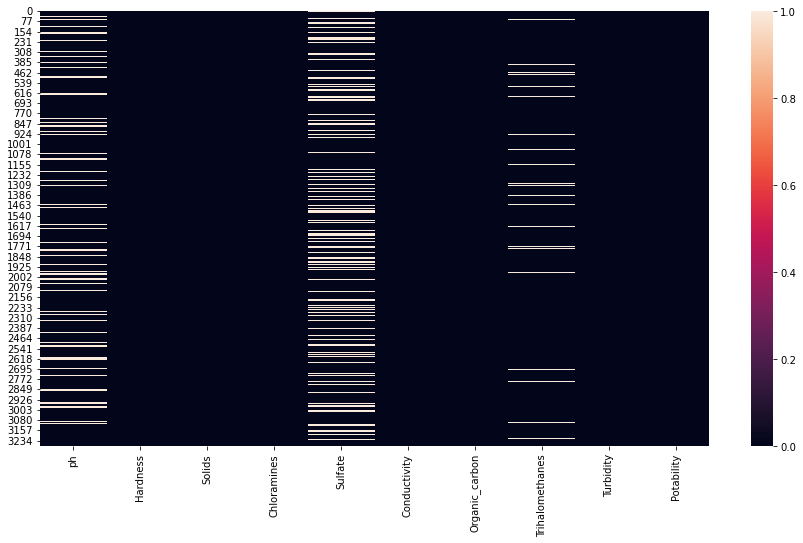

In [12]:
# Display missing values using a heatmap to understand if any patterns are present
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull());

Mean pH value 7.080794504276819 
 Median pH value 7.036752103833548 
 Min pH value 0.0 
 Max pH value 13.999999999999998


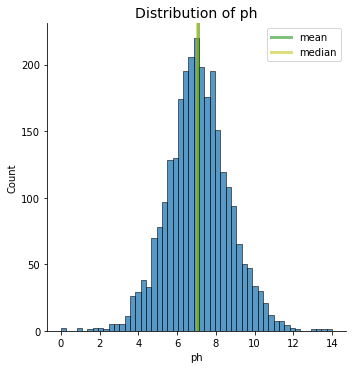

In [13]:
# set the histogram, mean and median
sns.displot(df["ph"], kde=False)
plt.axvline(x=df.ph.mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=df.ph.median(), linewidth=3, color='y', label="median", alpha=0.5)

# set title, legends and labels
plt.xlabel("ph")
plt.ylabel("Count")
plt.title("Distribution of ph", size=14)
plt.legend(["mean", "median"]);

print(f'Mean pH value {df.ph.mean()} \n Median pH value {df.ph.median()} \n Min pH value {df.ph.min()} \n Max pH value {df.ph.max()}')

# Predict Potability

In [14]:
# Preprocessing
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
# Performance metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [15]:
# Apply mean value to the missing values
df['ph'].fillna(df['ph'].mean(), inplace=True)
df['Sulfate'].fillna(df['Sulfate'].mean(), inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), inplace=True)
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [16]:
# Separate into X and y variables
X = df.drop(['Potability'], axis=1)
y = df['Potability'].values

In [17]:
# Display the features
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [18]:
# Does scaling the features change the dynamics
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

Mean of Unscaled Features: ph                     7.080795
Hardness             196.369496
Solids             22014.092526
Chloramines            7.122277
Sulfate              333.775777
Conductivity         426.205111
Organic_carbon        14.284970
Trihalomethanes       66.396293
Turbidity              3.966786
dtype: float64
Standard Deviation of Unscaled Features: ph                    1.469732
Hardness             32.874743
Solids             8767.232421
Chloramines           1.582843
Sulfate              36.137095
Conductivity         80.811727
Organic_carbon        3.307657
Trihalomethanes      15.767474
Turbidity             0.780263
dtype: float64
Mean of Scaled Features: 3.1955625682332546e-16
Standard Deviation of Scaled Features: 1.0


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [19]:
# k-NN classifier

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=2, stratify=y)

# Create a k-NN classifier with 7 neighbors
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.5659801678108314


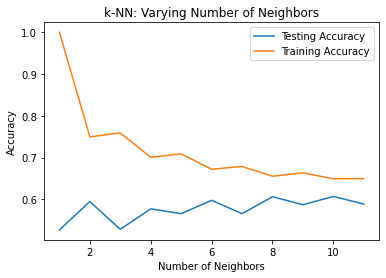

In [20]:
# Lets understand the performance of the k-NN classifer across a range of clusters
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 12)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
 # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [21]:
# Setup the pipeline steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)
# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.6247139588100686
Accuracy without Scaling: 0.5659801678108314


In [22]:
# Decision Tree classifier
# Setup the parameters and distributions to sample
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier
tree = DecisionTreeClassifier()
# Instantiate the RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 6}
Best score is 0.6217957549804506


In [23]:
class ModelBuild():
    # Constructor
    def __init__(self, X, y, model=DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=8)):
        self.X = X
        self.y = y
        self.model = model
    
    # Method to perform the train test split
    def _train_test_split(self):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.3, random_state=42)
        return X_train, X_test, y_train, y_test
     # Method to set the pipeline
    def _pipeline(self):
        steps = [('scaler', StandardScaler()),
                 ('model_name', self.model)]
        return Pipeline(steps)
    
    # Method to run all steps
    def model_build(self):
        if __name__ == "__main__":
            X_train, X_test, y_train, y_test = self._train_test_split()
            pipeline = self._pipeline()
            fit = pipeline.fit(X_train, y_train)
            return print("Accuracy: {}".format(pipeline.score(X_test, y_test)))

In [24]:
ModelBuild(X, y).model_build()

Accuracy: 0.6378433367243134


In [26]:
class FeatureSelection(ModelBuild):
    
    # Inherit the ModelBuild features
    def __init__(self, X, y, model=RandomForestClassifier()):
        super().__init__(X, y, model=RandomForestClassifier())
        self.X = X
        self.y = y
        self.model = model
    
    # Method to evaluate list of models
    def rfe_model(self):
        model_dict = dict()
        for i in range(2, len(self.X.columns)):
            rfe = RFE(estimator=self.model, n_features_to_select=i)
            model = DecisionTreeClassifier()
            model_dict[str(i)] = Pipeline(steps=[('rfe', rfe), ('mod', model)])
        return model_dict
    
    # Method to evaluate the models
    def eval_model(self, model):
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=6)
        scores = cross_val_score(model, self.X, self.y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
        return scores
    
    # Lets understand the features being selected
    def feature_select(self, n_feature):
        rfe = RFE(estimator=self.model, n_features_to_select=n_feature)
        rfe.fit(self.X, self.y)
#         for i in range(X.shape[1]):
        for i, col in enumerate(X.columns):
            print('Column: %s, Selected %s, Rank: %.3f' % (col, rfe.support_[i], rfe.ranking_[i]))   
    
    # Method to run all steps
    def feature_selection(self):
        if __name__ == "__main__":
            models = self.rfe_model()
            results, names = list(), list()
            for name, model in models.items():
                scores = self.eval_model(model)
                results.append(scores)
                names.append(name)
                print(f'{name}, mean_score: {np.mean(scores)}, std_score: {np.std(scores)}')
                box_plt = plt.boxplot(results, labels=names, showmeans=True)
            return box_plt

2, mean_score: 0.5661290122075532, std_score: 0.025463593978485757
3, mean_score: 0.5548454165734319, std_score: 0.018541504155761418
4, mean_score: 0.5745888341910941, std_score: 0.02588138006928909
5, mean_score: 0.5721473235374556, std_score: 0.024989649933970355
6, mean_score: 0.5609395589368738, std_score: 0.025852679342621473
7, mean_score: 0.5713308967952064, std_score: 0.02379006535633293
8, mean_score: 0.582207677581363, std_score: 0.024771068265245607


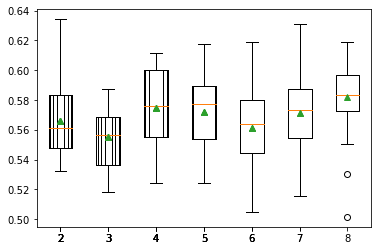

In [27]:
box = FeatureSelection(X, y, model=DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=8)).feature_selection()
plt.show()

In [28]:
features = FeatureSelection(X, y, model=DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=8)).feature_select(5)

Column: ph, Selected True, Rank: 1.000
Column: Hardness, Selected False, Rank: 5.000
Column: Solids, Selected True, Rank: 1.000
Column: Chloramines, Selected False, Rank: 4.000
Column: Sulfate, Selected True, Rank: 1.000
Column: Conductivity, Selected False, Rank: 3.000
Column: Organic_carbon, Selected False, Rank: 2.000
Column: Trihalomethanes, Selected True, Rank: 1.000
Column: Turbidity, Selected True, Rank: 1.000
